In [1]:
# set the font globally
#plt.rcParams.update({'font.family':'sans-serif'})

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series,DataFrame
import scipy
from scipy import stats
import matplotlib as mpl
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [4]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,plot,iplot

In [5]:
import cufflinks as cf

In [6]:
cf.go_offline()

In [7]:
import pandas_datareader.data as web
import datetime as dt
from datetime import datetime

In [8]:
from pandas_datareader import DataReader

In [9]:
from pandas_datareader import data
from datetime import date,timedelta
from dateutil.relativedelta import relativedelta


In [10]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#today's date minus a year ago

end = datetime.now()
end_end = end - relativedelta(years=1)
start = datetime(end_end.year,end.month, end.day)

#print(end.year, end.month, end.day, end.hour, end.minute, end.second)

In [11]:
for stock in tech_list:
    globals()[stock] =DataReader(stock,"yahoo", start,end)

In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-08-14 to 2021-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [13]:
#using iplot we can plot the adjusted opening and closing charts for appl stock
AAPL.iplot()

In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-08-14 to 2021-08-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [15]:
#adjusted closing price

#AAPL["Adj Close"].plot(legend=True, figsize=(10,4))
px.line(AAPL["Adj Close"])

In [16]:
#volume of stock been traded each day
fig = AAPL["Adj Close"]
px.line(fig)


In [17]:
#volume of stock been traded each day
fig2 = AAPL["Volume"]
px.line(fig2)

In [18]:
#creating a macd for apple stock
ma_day = [10,20,50] #10,20,50 Moving day average

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL["Adj Close"].rolling(ma).mean()

In [19]:
#AAPL[["Adj Close", "MA for 10 days", 
     #"MA for 20 days", "MA for 50 days"]].plot(subplots=False, figsize=(10,4))
px.line(AAPL[["Adj Close", "MA for 10 days", 
     "MA for 20 days", "MA for 50 days"]])

In [20]:
#Doing a candlestick chart for AAPL
#adding macd lines to the plotly fig
fig =  go.Figure(data=[go.Candlestick(x=AAPL.index,
                open=AAPL['Open'], high=AAPL['High'],
                low=AAPL['Low'], close=AAPL['Close'],name="Candle Stick", showlegend=True)],
                layout =dict(title="Apple Stock Candlestick and Moving Averages",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="August 2020-2021")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Price in $USD"))))
fig.add_trace(go.Scatter(name="10 Days MA",x=AAPL.index, y=AAPL["MA for 10 days"] ,line=dict(color='orange', width=1)))
fig.add_trace(go.Scatter(name="20 Days MA",x=AAPL.index, y=AAPL["MA for 20 days"], line=dict(color='green', width=1)))
fig.add_trace(go.Scatter(name="50 Days MA",x=AAPL.index, y=AAPL["MA for 50 days"], line=dict(color='blue', width=1)))


fig.show()
#px.line(AAPL[["Adj Close", "MA for 10 days", 
     #"MA for 20 days", "MA for 50 days"]])                      

layout =dict(title="Apple Stock Candlestick and Moving Averages",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text="Date 2020-2021")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Price in $USD")))
           
#fig.write_html("C:/Users/Marthinz/Documents/Data Analysis practice/plotly.html")

In [21]:
#fig.write_html("C:/Users/Marthinz/Documents/Data Analysis practice/Apple Stock Data Visualisation.html")

In [22]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2020-08-14,115.000000,113.044998,114.830002,114.907501,165565200.0,114.173164,NaN,NaN,NaN
2020-08-17,116.087502,113.962502,116.062500,114.607498,119561600.0,113.875069,NaN,NaN,NaN
2020-08-18,116.000000,114.007500,114.352501,115.562500,105633600.0,114.823975,NaN,NaN,NaN
2020-08-19,117.162498,115.610001,115.982498,115.707497,145538000.0,114.968048,NaN,NaN,NaN
2020-08-20,118.392502,115.732498,115.750000,118.275002,126907200.0,117.519142,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-08-09,146.699997,145.520004,146.199997,146.089996,48908700.0,146.089996,146.061945,146.321664,138.016972
2021-08-10,147.710007,145.300003,146.440002,145.600006,68922200.0,145.600006,145.966902,146.330558,138.440501
2021-08-11,146.720001,145.529999,146.050003,145.860001,48422100.0,145.860001,146.076591,146.177215,138.875819


In [23]:
fig3 =AAPL[["Adj Close", "MA for 10 days", 
     "MA for 20 days", "MA for 50 days"]]
px.line(fig3)

In [24]:
#daily returns and risks of the stock
#use pandas to retrieve the daily returns for the stock
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()
AAPL["Daily Return"].dropna(inplace=True)

In [25]:
#AAPL["Daily Return"].plot(figsize=(10,4), legend=True, linestyle="--", marker="o")
px.line(AAPL["Daily Return"],line_shape="linear" )

In [26]:
#sns.distplot(AAPL["Daily Return"].dropna(), bins=10, color="purple")
import plotly.figure_factory as ff
hist_data = AAPL["Daily Return"]

#fig = ff.create_distplot(hist_data, group_labels="Daily Return",show_rug=False, nbins=20)
#fig.show()
px.histogram(hist_data,marginal="rug")

In [27]:
fig6 = AAPL["Daily Return"]
px.histogram(fig6,nbins=20)

In [28]:
closing_df = DataReader(tech_list, "yahoo", start,end)["Adj Close"]

In [29]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-14,114.173164,1507.729980,206.896698,3148.020020
2020-08-17,113.875069,1517.979980,208.263489,3182.409912
2020-08-18,114.823975,1558.599976,209.461884,3312.489990
2020-08-19,114.968048,1547.530029,208.191086,3260.479980
2020-08-20,117.519142,1581.750000,213.035965,3297.370117
...,...,...,...,...
2021-08-09,146.089996,2760.040039,288.329987,3341.870117
2021-08-10,145.600006,2761.929932,286.440002,3320.679932
2021-08-11,145.860001,2753.790039,286.950012,3292.110107


In [30]:
tech_rets = closing_df.pct_change()

In [31]:
tech_rets.dropna(inplace=True)

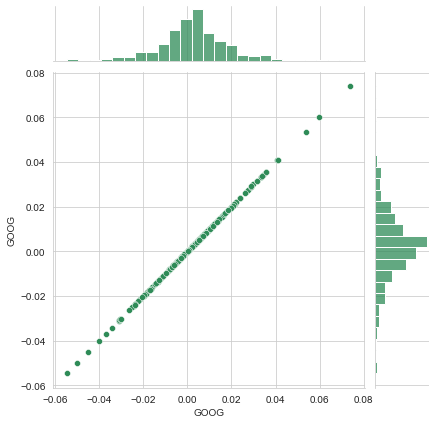

In [32]:
#comparing google to itself in terms of returns
sns.jointplot(x="GOOG", y="GOOG", data=tech_rets, kind="scatter", color="seagreen")

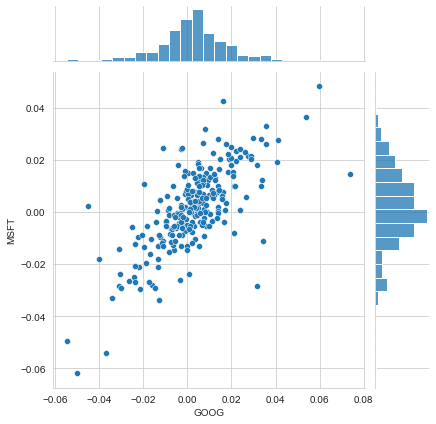

In [33]:
#comparing google to microsoft stock
sns.jointplot(x="GOOG", y="MSFT", data=tech_rets, kind="scatter")

In [34]:
import sweetviz as sv



In [35]:
fig8 = px.scatter(tech_rets, x="GOOG", y="MSFT", marginal_x="histogram", marginal_y="histogram")
fig8.show()

# FOR MANIPULATING SEABORN AND MATPLOTLIB FONTS

In [36]:
#FOR MANIPULATING SEABORN AND MATPLOTLIB FONTS
#import matplotlib.pyplot as plt
# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
#plt.style.use('seaborn-white')

#plt.rcParams['font.family'] = 'cursive'
#plt.rcParams['font.serif'] = 'Ubuntu'
#plt.rcParams['font.monospace'] = 'Ubuntu Mono'
#plt.rcParams['font.size'] = 10
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 10
#plt.rcParams['xtick.labelsize'] = 8
#plt.rcParams['ytick.labelsize'] = 8
#plt.rcParams['legend.fontsize'] = 10
#plt.rcParams['figure.titlesize'] = 12

# Set an aspect ratio
#width, height = plt.figaspect(1.68)
#fig = plt.figure(figsize=(width,height), dpi=400)

In [37]:
#my_report = sv.compare([tech_rets.AAPL, tech_rets.MSFT], compare=[tech_rets.AAPL, tech_rets.MSFT])

In [38]:
my_report.show_html("SweetViz EDA.html")

NameError: name 'my_report' is not defined

Candlestick without Rangeslider

In [39]:
tech_rets.scatter_matrix()

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = px.scatter_matrix(tech_rets)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(px.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(px.line, kind="kde")

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(px.histogram,bins=30)

AttributeError: 'Figure' object has no attribute 'map_upper'

In [41]:
#correlation between returns
corr = tech_rets.corr()
corr.iplot(kind="heatmap")

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

Risk Analysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

px.scatter(x=rets.mean(), y=rets.std(),opacity= 0.5,labels={"x":"Expected Returns", "y":"Risk"})

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)


#Set the plot axis titles
#plt.xlabel('Expected returns')
#plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
#for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    #plt.annotate(
        #label, 
        #xy = (x, y), xytext = (50, 50),
        #textcoords = 'offset points', ha = 'right', va = 'bottom',
        #arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
help(px.scatter)

#code from Teacher, modified above

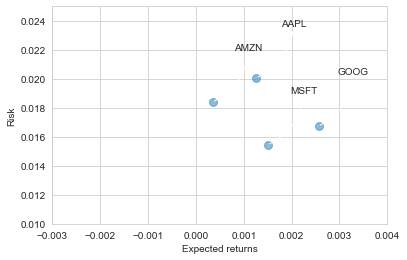

In [42]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [43]:
corr_closing = closing_df.corr()
corr_closing.iplot(kind="heatmap", interpolation=False)

Risk Analysis

In [44]:
rets = tech_rets.dropna()
area = np.pi*20
area_plotted = px.scatter(data_frame=rets, x=rets.mean(), y=rets.std(), size_max=area, 
           labels={"x":"Expected Returns", "y":"Risk"})

area_plotted.show()
    

Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

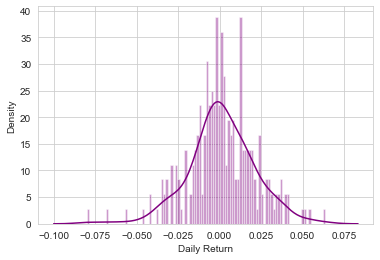

In [45]:
sns.distplot(AAPL["Daily Return"], bins=100, color="purple")

In [46]:
#Quantile
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-08-17,-0.002611,0.006798,0.006606,0.010924
2020-08-18,0.008333,0.026759,0.005754,0.040875
2020-08-19,0.001255,-0.007102,-0.006067,-0.015701
2020-08-20,0.022190,0.022113,0.023271,0.011314
2020-08-21,0.051532,-0.000841,-0.007270,-0.003836


In [47]:
rets["AAPL"].quantile(0.05)
#At 95% confidence level, worst daily return would not exceed the value below

-0.03246292298239756


The 0.05 empirical quantile of daily returns is at -0.03. That means that with 95% confidence, our worst daily loss will not exceed 3.2%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

Value at Risk using the Monte Carlo method¶
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

ΔSS=μΔt+σϵΔt−−−√
Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS=S(μΔt+σϵΔt−−−√)
Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [48]:
#define the days
days =365
dt =1/days
mu = rets.mean()["GOOG"]
sigma = rets.std()["GOOG"]

In [58]:
#monte carlo stock price risk and movement
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] =np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu *dt
        price[x] = price[x-1] + (price[x-1] *(drift[x] + shock[x]))
        
    return price

In [50]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-14,1521.900024,1502.880005,1515.660034,1507.729980,1354800,1507.729980
2020-08-17,1525.609985,1507.969971,1514.670044,1517.979980,1378300,1517.979980
2020-08-18,1562.469971,1523.709961,1526.180054,1558.599976,2027100,1558.599976
2020-08-19,1573.680054,1543.949951,1553.310059,1547.530029,1660600,1547.530029
2020-08-20,1585.869995,1538.199951,1543.449951,1581.750000,1706900,1581.750000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

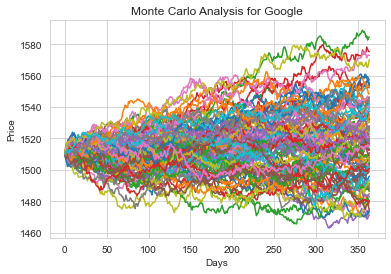

In [67]:
#runnning the monte carlo movement
start_price = 1510.4

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")


In [68]:
#much larger runs
runs =10000

simulations =np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [69]:
#1% empirical quartile
q = np.percentile(simulations,1)

In [72]:


px.histogram(simulations, nbins=200)

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

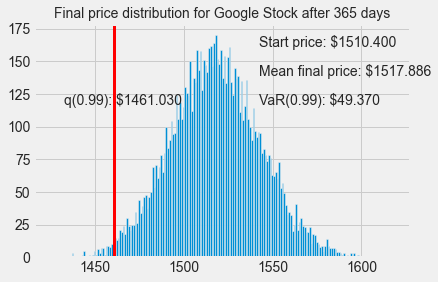

In [79]:
#Using the teacher's code
plt.style.use('fivethirtyeight')
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.3f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.3f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.3f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.3f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=3, color='r')

# Title
plt.title("Final price distribution for Google Stock after %s days" % days, weight='light', size=14)

VAR explains the maximum amount you would loose on the stock  over the given period of time. The above simulation shows at 99% of the time 